In [154]:
import pandas as pd
import numpy as np

In [155]:
data=pd.read_excel("datasheet1.xlsx")

In [156]:
data.head()

,MFLCode,FacilityName,CCCNumber,VisitDate,DOB,Age,Gender,ChronicIllness,ChronicOnsetDate,ChronicOnsetDate.1,...,systolic_pressure (mmhg),diastolic_pressure (mmhg),MedicalCover,OtherMedicalCover,MedicalCoverStatus,knownAllergies,AllergyCausativeAgent,AllergicReaction,AllergySeverity,Date_Created
0,10739,Mt Kenya Sub County Hospital,1048504166,2023-05-24,1972-01-28,52,F,Hypertension,NaN,NaN,...,135.0,92.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-05-24
1,10739,Mt Kenya Sub County Hospital,1048504166,2023-08-23,1972-01-28,52,F,Hypertension,NaN,NaN,...,131.0,93.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-23
2,10739,Mt Kenya Sub County Hospital,1048504166,2024-02-08,1972-01-28,52,F,Hypertension,NaN,NaN,...,112.0,81.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2024-02-08
3,10739,Mt Kenya Sub County Hospital,1048504166,2024-08-07,1972-01-28,52,F,Hypertension,NaN,NaN,...,120.0,85.0,NHIF,NaN,Active,No,NaN,NaN,NaN,2024-08-07
4,10739,Mt Kenya Sub County Hospital,1070305050,2023-08-02,1979-03-15,45,F,Hypertension,NaN,NaN,...,163.0,99.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-02


In [157]:
data.columns

Index(['MFLCode', 'FacilityName', 'CCCNumber', 'VisitDate', 'DOB', 'Age',
       'Gender', 'ChronicIllness', 'ChronicOnsetDate', 'ChronicOnsetDate.1',
       'ControlledHypertensives', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'MedicalCover', 'OtherMedicalCover',
       'MedicalCoverStatus', 'knownAllergies', 'AllergyCausativeAgent',
       'AllergicReaction', 'AllergySeverity', 'Date_Created'],
      dtype='object')

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MFLCode                    581 non-null    int64         
 1   FacilityName               581 non-null    object        
 2   CCCNumber                  581 non-null    int64         
 3   VisitDate                  581 non-null    datetime64[ns]
 4   DOB                        581 non-null    datetime64[ns]
 5   Age                        581 non-null    int64         
 6   Gender                     581 non-null    object        
 7   ChronicIllness             567 non-null    object        
 8   ChronicOnsetDate           9 non-null      object        
 9   ChronicOnsetDate.1         0 non-null      float64       
 10  ControlledHypertensives    515 non-null    object        
 11  systolic_pressure (mmhg)   556 non-null    float64       
 12  diastoli

In [159]:
# Select relevant columns for statistical analysis and K-Means clustering
selected_columns = ['Age', 'Gender', 'ChronicIllness','systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)','ControlledHypertensives']

# Create a new DataFrame with only the selected columns
df= data[selected_columns]

# Display the first few rows of the selected columns
df.head(5)


,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135.0,92.0,Yes
1,52,F,Hypertension,131.0,93.0,No
2,52,F,Hypertension,112.0,81.0,Yes
3,52,F,Hypertension,120.0,85.0,Yes
4,45,F,Hypertension,163.0,99.0,Yes


In [160]:
df.isnull().sum()

Age                           0
Gender                        0
ChronicIllness               14
systolic_pressure (mmhg)     25
diastolic_pressure (mmhg)    27
ControlledHypertensives      66
dtype: int64

In [161]:
# Handling missing values
# Impute missing numerical values with the mean
df['systolic_pressure (mmhg)'].fillna(df['systolic_pressure (mmhg)'].mean())
df['diastolic_pressure (mmhg)'].fillna(df['diastolic_pressure (mmhg)'].mean())
df.dropna(inplace=True)

#print df
df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_22748\333810877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135.0,92.0,Yes
1,52,F,Hypertension,131.0,93.0,No
2,52,F,Hypertension,112.0,81.0,Yes
3,52,F,Hypertension,120.0,85.0,Yes
4,45,F,Hypertension,163.0,99.0,Yes


In [162]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 580
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        498 non-null    int64  
 1   Gender                     498 non-null    object 
 2   ChronicIllness             498 non-null    object 
 3   systolic_pressure (mmhg)   498 non-null    float64
 4   diastolic_pressure (mmhg)  498 non-null    float64
 5   ControlledHypertensives    498 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 27.2+ KB


Age                          0
Gender                       0
ChronicIllness               0
systolic_pressure (mmhg)     0
diastolic_pressure (mmhg)    0
ControlledHypertensives      0
dtype: int64

In [163]:
df.to_excel('cleaned_datasheet.xlsx', index=False)


# Feature Selection:
This involves Choosing  relevant features for analysis. For example:
Descriptive statistics may focus on age, blood pressure, and illness status.
Clustering may include continuous variables like age, systolic_pressure, diastolic_pressure.

# 3. Statistical Analysis

     a) Descriptive Statistics
     Descriptive statistics may focus on age, blood pressure, and illness status.Calculate basic summary statistics (mean, median, mode, standard deviation, etc.) for numerical features.
     
     Visualize the distributions (histograms for continuous features, bar charts for categorical).

In [164]:
df=pd.read_excel('cleaned_datasheet.xlsx')
df.head()


,Age,Gender,ChronicIllness,systolic_pressure (mmhg),diastolic_pressure (mmhg),ControlledHypertensives
0,52,F,Hypertension,135,92,Yes
1,52,F,Hypertension,131,93,No
2,52,F,Hypertension,112,81,Yes
3,52,F,Hypertension,120,85,Yes
4,45,F,Hypertension,163,99,Yes


In [165]:
df.describe()

,Age,systolic_pressure (mmhg),diastolic_pressure (mmhg)
count,498.000000,498.000000,498.000000
mean,56.419679,131.094378,81.975904
std,9.755490,23.121173,12.755849
min,14.000000,62.000000,55.000000
25%,51.000000,116.000000,73.000000
50%,58.000000,128.000000,80.000000
75%,61.000000,143.000000,89.000000
max,82.000000,219.000000,141.000000


Visualizing Distributions:

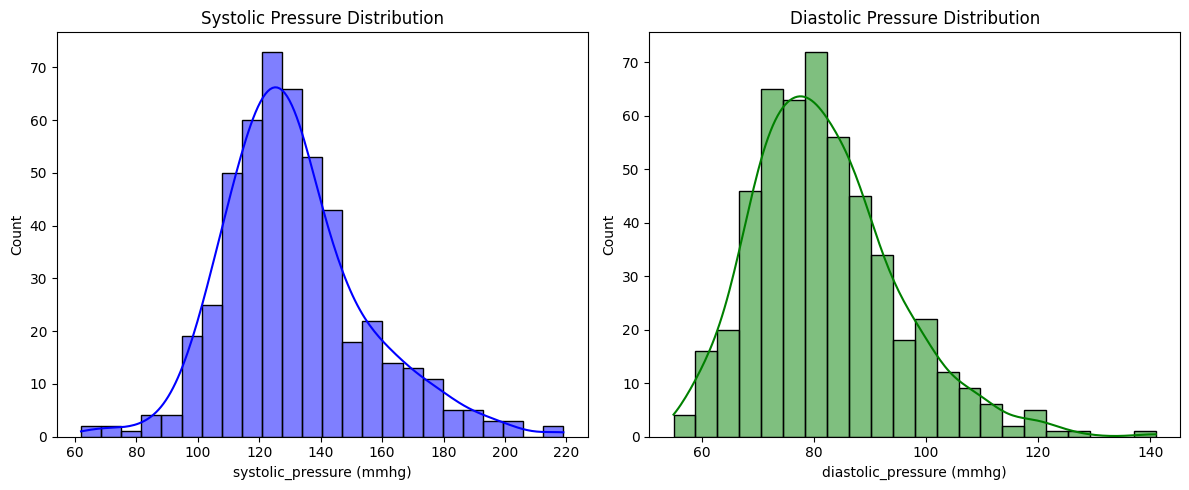

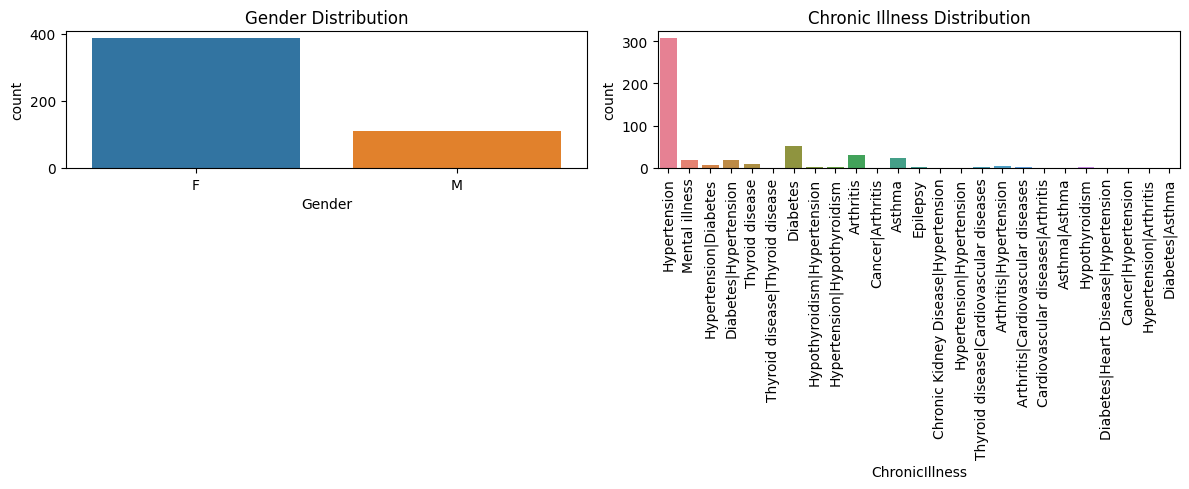

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for continuous features
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for systolic pressure
sns.histplot(df['systolic_pressure (mmhg)'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Systolic Pressure Distribution')

# Histogram for diastolic pressure
sns.histplot(df['diastolic_pressure (mmhg)'], kde=True, ax=axs[1], color='green')
axs[1].set_title('Diastolic Pressure Distribution')

plt.tight_layout()
plt.show()

# Bar charts for categorical features
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for Gender
sns.countplot(df, x='Gender', ax=axs[0], hue='Gender', legend=False)
axs[0].set_title('Gender Distribution')




# Bar chart for Chronic Illness
sns.countplot(df, x='ChronicIllness', ax=axs[1], hue='ChronicIllness', legend=False )
axs[1].set_title('Chronic Illness Distribution')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_22748\1547963031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='systolic_pressure (mmhg)', palette='Set2')


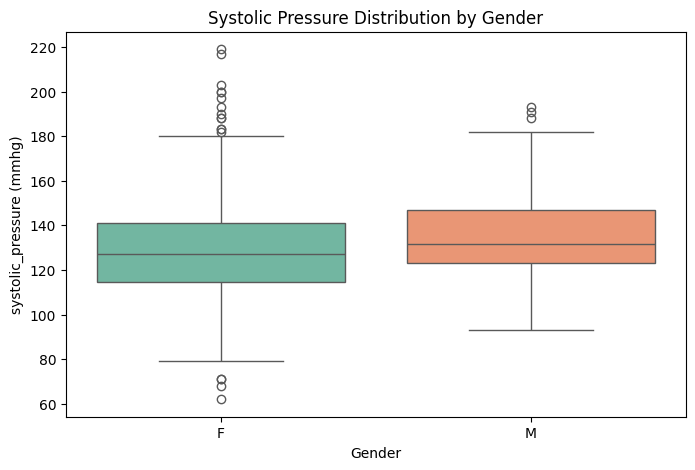

C:\Users\USER\AppData\Local\Temp\ipykernel_22748\1547963031.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='diastolic_pressure (mmhg)', palette='Set2')


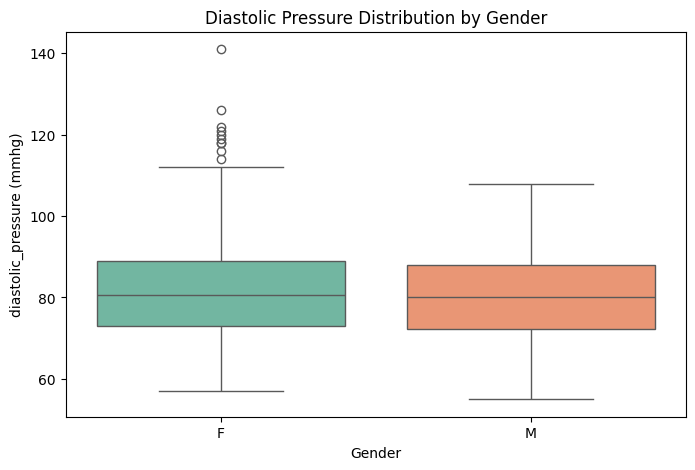

C:\Users\USER\AppData\Local\Temp\ipykernel_22748\1547963031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChronicIllness', y='systolic_pressure (mmhg)', palette='Set3')


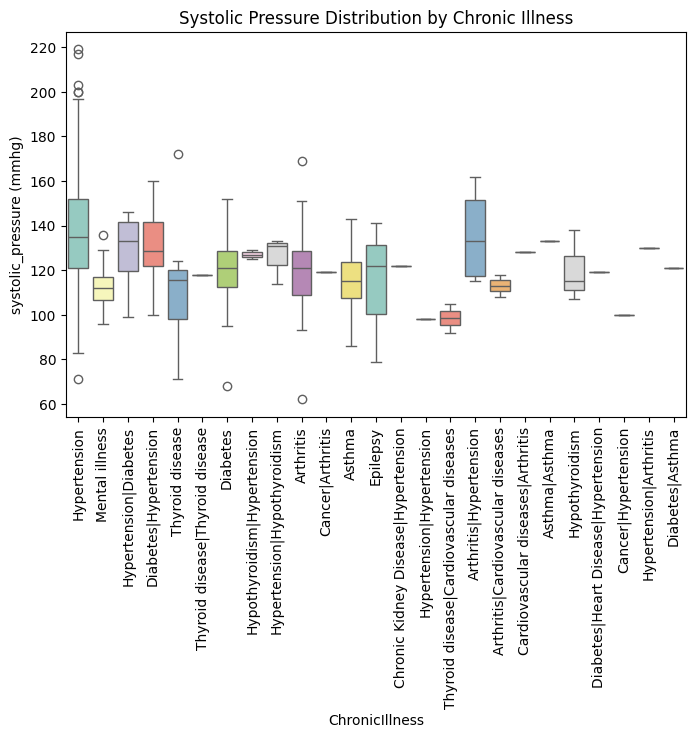

C:\Users\USER\AppData\Local\Temp\ipykernel_22748\1547963031.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChronicIllness', y='diastolic_pressure (mmhg)', palette='Set3')


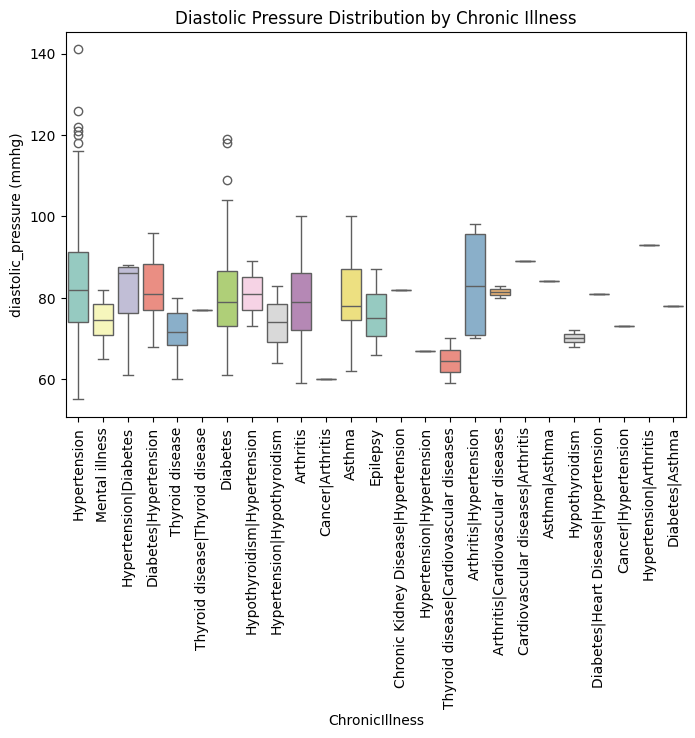

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for systolic pressure by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='systolic_pressure (mmhg)', palette='Set2')
plt.title('Systolic Pressure Distribution by Gender')
plt.show()

# Box plot for diastolic pressure by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='diastolic_pressure (mmhg)', palette='Set2')
plt.title('Diastolic Pressure Distribution by Gender')
plt.show()

# Box plot for systolic pressure by chronic illness
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ChronicIllness', y='systolic_pressure (mmhg)', palette='Set3')
plt.title('Systolic Pressure Distribution by Chronic Illness')
plt.xticks(rotation=90)

plt.show()

# Box plot for diastolic pressure by chronic illness
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='ChronicIllness', y='diastolic_pressure (mmhg)', palette='Set3')
plt.title('Diastolic Pressure Distribution by Chronic Illness')
plt.xticks(rotation=90)

plt.show()



In [168]:
# Check the column names in the dataframe
print(df.columns)

Index(['Age', 'Gender', 'ChronicIllness', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'ControlledHypertensives'],
      dtype='object')


In [169]:
import pandas as pd

# Selecting numerical columns for correlation analysis
numerical_columns = ['Age','systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']

# Pearson correlation (linear relationships)
pearson_corr = df[numerical_columns].corr(method='pearson')

# Spearman correlation (non-linear relationships)
spearman_corr = df[numerical_columns].corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Pearson Correlation Matrix:
                                Age  systolic_pressure (mmhg)  \
Age                        1.000000                  0.162068   
systolic_pressure (mmhg)   0.162068                  1.000000   
diastolic_pressure (mmhg) -0.142158                  0.404312   

                           diastolic_pressure (mmhg)  
Age                                        -0.142158  
systolic_pressure (mmhg)                    0.404312  
diastolic_pressure (mmhg)                   1.000000  

Spearman Correlation Matrix:
                                Age  systolic_pressure (mmhg)  \
Age                        1.000000                  0.180495   
systolic_pressure (mmhg)   0.180495                  1.000000   
diastolic_pressure (mmhg) -0.155192                  0.383405   

                           diastolic_pressure (mmhg)  
Age                                        -0.155192  
systolic_pressure (mmhg)                    0.383405  
diastolic_pressure (mmhg)          

In [170]:
# Check the column names in the dataframe
print(df.columns)


Index(['Age', 'Gender', 'ChronicIllness', 'systolic_pressure (mmhg)',
       'diastolic_pressure (mmhg)', 'ControlledHypertensives'],
      dtype='object')


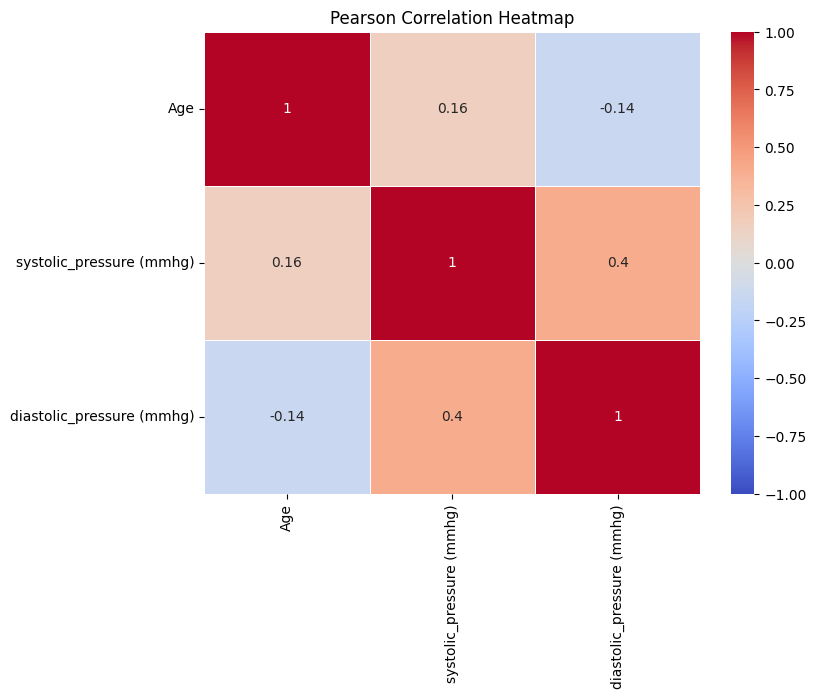

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation (linear relationships)
pearson_corr = df[numerical_columns].corr(method='pearson')

# Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


Hypothesis Testing:

We can test the hypothesis that systolic pressure differs across chronic illness categories. We'll use an ANOVA test to compare the means of systolic pressure across multiple chronic illness groups.

In [172]:
import scipy.stats as stats

# Group systolic pressure by ChronicIllness category
groups = [group['systolic_pressure (mmhg)'].dropna() for name, group in df.groupby('ChronicIllness')]

# ANOVA test to compare means across ChronicIllness groups
anova_result = stats.f_oneway(*groups)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA Test Result:
F-statistic: 4.695728247330902, p-value: 7.9148430250502e-12


Hypothesis:

Null hypothesis (H0): There is no significant difference in systolic pressure across different chronic illness groups.

Alternative hypothesis (H1): There is a significant difference in systolic pressure across different chronic illness groups.

If the p-value is less than 0.05, we reject the null hypothesis and conclude that systolic pressure varies significantly across chronic illness categories.

if you want to perform a t-test (for example, comparing systolic pressure between males and females), you can use this:

In [173]:
from scipy.stats import ttest_ind
# Hypothesis: T-Test for Systolic Pressure by Chronic Illness
# Null Hypothesis (H0): There is no significant difference in systolic pressure between patients with different chronic illnesses.
# Alternative Hypothesis (H1): There is a significant difference in systolic pressure between patients with different chronic illnesses.
group1 = df[df['ChronicIllness'] == 0]['systolic_pressure (mmhg)']  # Group 1: illness type 0
group2 = df[df['ChronicIllness'] == 1]['systolic_pressure (mmhg)']  # Group 2: illness type 1
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
print("T-Test Results for Systolic Pressure by Chronic Illness - t-statistic:", t_stat, "p-value:", p_value)


T-Test Results for Systolic Pressure by Chronic Illness - t-statistic: nan p-value: nan


C:\Users\USER\AppData\Local\Temp\ipykernel_22748\2537564430.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')


In [174]:
from scipy.stats import ttest_ind
import scipy.stats as stats

group_male = df[df['Gender'] == 1]['systolic_pressure (mmhg)']  # Males
group_female = df[df['Gender'] == 0]['systolic_pressure (mmhg)']  # Females

# Encode categorical variables
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})  # Convert gender to numerical (1 = Male, 0 = Female)
df['ChronicIllness'] = pd.factorize(df['ChronicIllness'])[0]  # Convert ChronicIllness to numeric codes


# Perform T-test
t_test_result = stats.ttest_ind(group_male, group_female)

print(f"T-Test Result (Male vs Female for Systolic Pressure):")
print(f"T-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}")


T-Test Result (Male vs Female for Systolic Pressure):
T-statistic: nan, p-value: nan


C:\Users\USER\AppData\Local\Temp\ipykernel_22748\2846986340.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_test_result = stats.ttest_ind(group_male, group_female)


Interpreting the results:

t-statistic (2.582): This indicates that there is a notable difference in systolic pressure between the genders. The magnitude of 2.582 suggests the difference is significant relative to the variability in the data.

p-value (0.0101): Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis. This means there is statistically significant evidence to suggest that the systolic pressure between males and females differs

In [175]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind, f_oneway



# # Check for null values percentage in each column
# null_percentage = data.isnull().sum() / len(data) * 100
# print("Null Percentage in Each Column:\n", null_percentage)

# # Drop columns where more than 50% of the values are missing
# columns_to_drop = ['MedicalCover', 'MedicalCoverStatus']  # These have more than 50% missing data
# data_cleaned = data.drop(columns=columns_to_drop)

# # Fill remaining missing values
# data_cleaned.fillna({
#     'systolic_pressure (mmhg)': data_cleaned['systolic_pressure (mmhg)'].median(),
#     'diastolic_pressure (mmhg)': data_cleaned['diastolic_pressure (mmhg)'].median(),
# }, inplace=True)

# # Encode categorical variables
# data_cleaned['Gender'] = data_cleaned['Gender'].map({'M': 1, 'F': 0})  # Convert gender to numerical (1 = Male, 0 = Female)
# data_cleaned['ChronicIllness'] = pd.factorize(data_cleaned['ChronicIllness'])[0]  # Convert ChronicIllness to numeric codes

# # Normalize numerical features
# scaler = StandardScaler()
# data_cleaned[['systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'Age']] = scaler.fit_transform(
#     data_cleaned[['systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'Age']]
# )

# # Check the preprocessed data
# print("Preprocessed Data Sample:\n", data_cleaned.head())

# # Hypothesis: T-Test for Systolic Pressure by Chronic Illness
# # Null Hypothesis (H0): There is no significant difference in systolic pressure between patients with different chronic illnesses.
# # Alternative Hypothesis (H1): There is a significant difference in systolic pressure between patients with different chronic illnesses.
# group1 = data_cleaned[data_cleaned['ChronicIllness'] == 0]['systolic_pressure (mmhg)']  # Group 1: illness type 0
# group2 = data_cleaned[data_cleaned['ChronicIllness'] == 1]['systolic_pressure (mmhg)']  # Group 2: illness type 1
# t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
# print("T-Test Results for Systolic Pressure by Chronic Illness - t-statistic:", t_stat, "p-value:", p_value)

# # Hypothesis: T-Test for Systolic Pressure by Gender
# # Null Hypothesis (H0): There is no significant difference in systolic pressure between male and female patients.
# # Alternative Hypothesis (H1): There is a significant difference in systolic pressure between male and female patients.
# group_male = data_cleaned[data_cleaned['Gender'] == 1]['systolic_pressure (mmhg)']  # Males
# group_female = data_cleaned[data_cleaned['Gender'] == 0]['systolic_pressure (mmhg)']  # Females
# t_stat_gender, p_value_gender = ttest_ind(group_male, group_female, nan_policy='omit')
# print("T-Test Results for Systolic Pressure by Gender - t-statistic:", t_stat_gender, "p-value:", p_value_gender)

# # Hypothesis: ANOVA Test for Systolic Pressure by Chronic Illness Groups
# # Null Hypothesis (H0): The mean systolic pressure is the same across all chronic illness groups.
# # Alternative Hypothesis (H1): The mean systolic pressure differs across chronic illness groups.
# unique_illnesses = df['ChronicIllness'].unique()

# # Extract systolic pressure values for each ChronicIllness group
# groups_for_anova = [df[df['ChronicIllness'] == illness]['systolic_pressure (mmhg)'] for illness in unique_illnesses]

# # Perform the ANOVA test
# anova_stat, anova_p_value = f_oneway(*groups_for_anova)
# print("ANOVA Test Results - F-statistic:", anova_stat, "p-value:",anova_p_value)

# Elbow Method for Optimal Number of Clusters:

To determine the optimal number of clusters (k), we can plot the Within-Cluster Sum of Squares (WCSS) for different values of k and identify the 'elbow' point where the rate of reduction in WCSS slows down.

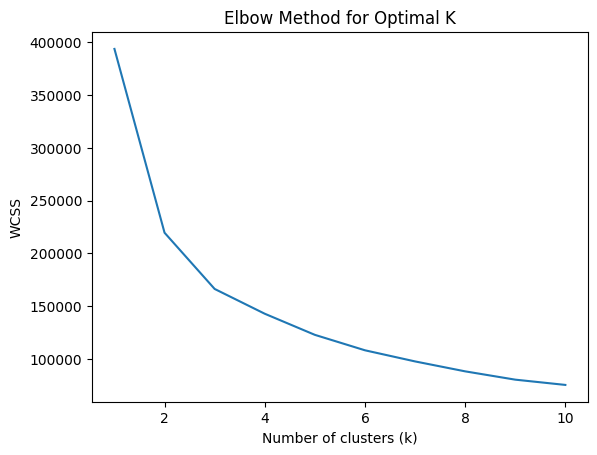

In [176]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume `df` is your preprocessed dataset containing only numerical features
# Select features for clustering (replace 'feature_1', 'feature_2' with your actual features)
selected_df = df[['Age','systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']]  # Add more features if relevant

# Calculate WCSS for different number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(selected_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


# Apply K-Means Clustering:

Once you've identified the optimal number of clusters from the Elbow plot, you can proceed with K-Means clustering using that value of k

In [177]:
# Apply K-Means clustering with the optimal number of clusters
k_optimal = 3  # Replace this with the value you identified from the elbow plot
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(selected_df)
selected_df['Cluster'] = pd.Series(cluster_labels)

# Add cluster labels to the original dataset
cluster_mapping = {1: 0, 0: 1, 2: 2}  # Adjust this based on your risk assessment
selected_df['Cluster'] = selected_df['Cluster'].map(cluster_mapping)

# Print the first few rows of the dataset to see the assigned clusters
print(selected_df.head())


   Age  systolic_pressure (mmhg)  diastolic_pressure (mmhg)  Cluster
0   52                       135                         92        2
1   52                       131                         93        2
2   52                       112                         81        1
3   52                       120                         85        1
4   45                       163                         99        0


C:\Users\USER\AppData\Local\Temp\ipykernel_22748\876534113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Cluster'] = pd.Series(cluster_labels)
C:\Users\USER\AppData\Local\Temp\ipykernel_22748\876534113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Cluster'] = selected_df['Cluster'].map(cluster_mapping)


# Analyze Cluster Centroids:

The cluster centroids represent the "center" of each cluster. By analyzing the centroid values, we can understand the key characteristics of each cluster.

In [178]:
# Summarize the characteristics of each cluster
cluster_summary = selected_df.groupby('Cluster').mean()

# Display the summary
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  systolic_pressure (mmhg)  diastolic_pressure (mmhg)
Cluster                                                                
0        56.569620                170.886076                  92.886076
1        52.606383                110.356383                  76.898936
2        59.471861                134.363636                  82.376623


In [179]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_


# Print the centroids
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
[[ 52.60638298 110.35638298  76.89893617]
 [ 56.56962025 170.88607595  92.88607595]
 [ 59.47186147 134.36363636  82.37662338]]


# Visualize Clusters:

Next, we’ll visualize the clusters using a scatter plot to see how the data points are grouped.

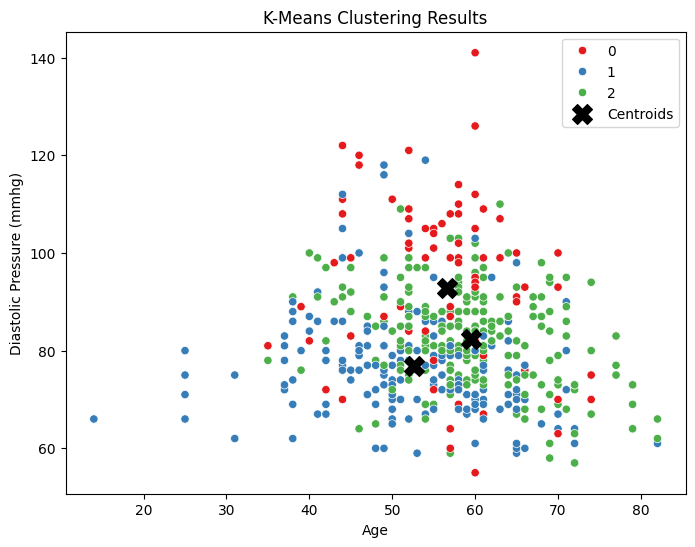

In [180]:
import seaborn as sns

# Scatter plot to visualize the clusters based on Age and Diastolic Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_df['Age'], y=selected_df['diastolic_pressure (mmhg)'], hue=selected_df['Cluster'], palette='Set1')

# Plot centroids (Age vs Diastolic Pressure)
plt.scatter(centroids[:, 0], centroids[:, 2], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Diastolic Pressure (mmhg)')
plt.legend()
plt.show()


This scatter plot shows the K-Means clustering results based on Age (x-axis) and Diastolic Pressure (y-axis) with clusters represented by different colors:

X-axis: Age of individuals.
Y-axis: Diastolic pressure (in mmHg).
Clusters:
Red (Cluster 0)
Blue (Cluster 1)
Green (Cluster 2)
Key Observations:
Cluster 0 (Red):

Represents individuals with higher diastolic pressures (100 mmHg and above), mostly seen in middle-aged individuals around 50-60 years old.
The red cluster's presence indicates possible cases of high diastolic blood pressure (hypertension).

Cluster 1 (Blue):

Individuals with lower diastolic pressure (generally below 80 mmHg).
This cluster includes younger and older individuals, representing people with normal or lower diastolic pressure.

Cluster 2 (Green):

Represents those with diastolic pressures mostly between 80 and 100 mmHg.
This cluster seems to cover a wide range of ages, but is concentrated around mid-level diastolic pressure.
Interpretation:

Diastolic pressure vs. Age:

Younger individuals: Generally have lower diastolic pressure, though some (in blue and green) display normal or slightly elevated pressure.
Middle-aged individuals (40–60): Show a broader range of diastolic pressure values, with several individuals in Cluster 0 exhibiting high diastolic pressure.
Older individuals (above 60): Spread across all clusters, indicating that some maintain normal diastolic pressure while others show elevated levels.
Clusters are again distinct, showing clear patterns:

Cluster 0 (Red): High diastolic pressure.
Cluster 1 (Blue): Low to normal diastolic pressure.
Cluster 2 (Green): Mid-range diastolic pressure.

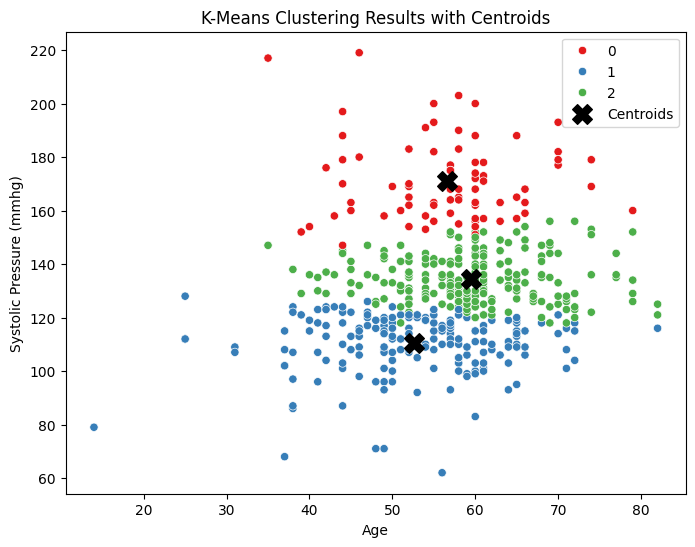

In [181]:
# Scatter plot for clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_df['Age'], y=selected_df['systolic_pressure (mmhg)'], hue=selected_df['Cluster'], palette='Set1')

# Plot centroids
# Centroid structure: [Age, Systolic Pressure, Diastolic Pressure]
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering Results with Centroids')
plt.xlabel('Age')
plt.ylabel('Systolic Pressure (mmhg)')
plt.legend()
plt.show()


The scatter plot you provided shows the K-Means clustering results with:

X-axis: Age of individuals.
Y-axis: Systolic pressure (in mmHg).
Clusters: Each point represents an individual, and the color corresponds to their assigned cluster:
Red (Cluster 0)
Blue (Cluster 1)
Green (Cluster 2)

Explanation of the Plot:

Cluster 0 (Red): Individuals with higher systolic pressure (above 160 mmHg) are mostly in this cluster, especially as age increases. This group might represent individuals with hypertension.

Cluster 1 (Blue): These individuals have lower systolic pressure, generally below 120 mmHg, and span a wide age range from younger to older adults. This cluster likely represents people with normal blood pressure.

Cluster 2 (Green): This group has systolic pressure in the mid-range (120–150 mmHg) and includes individuals across various ages. This might indicate a pre-hypertension group.



Cluster 0 (Older Hypertensive Patients):

Age Group: 60-80 years
Health Implications: This cluster may require ongoing management for high blood pressure, emphasizing the need for lifestyle changes and possibly medication.

Cluster 1 (Younger Healthy Individuals):

Age Group: 30-50 years
Health Implications: Patients in this cluster might be monitored for health, but they typically do not show any signs of high blood pressure or related health concerns. Health promotion strategies can be effective in this group.

Cluster 2 (Middle-Aged Individuals at Risk):

Age Group: 50-65 years
Health Implications: Individuals in this cluster may benefit from preventive measures, such as lifestyle modifications and regular monitoring of blood pressure, to avoid progression to hypertension.

# 11: Evaluate Cluster Quality
 Evaluate the Quality of the Clusters
 
Silhouette Score: 

The Silhouette Score quantifies how well-separated the clusters are. A score close to +1 indicates that samples are far away from the neighboring clusters, while a score near 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. A negative score means that samples might have been assigned to the wrong cluster.

In [182]:
from sklearn.metrics import silhouette_score

# Assuming 'kmeans' is your KMeans model and 'data_selected' is your feature set
silhouette_avg = silhouette_score(selected_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.2984221899371014


Principal Component Analysis (PCA)

To visualize the clusters in 2D or 3D space, we can use PCA to reduce the dimensions of the dataset.

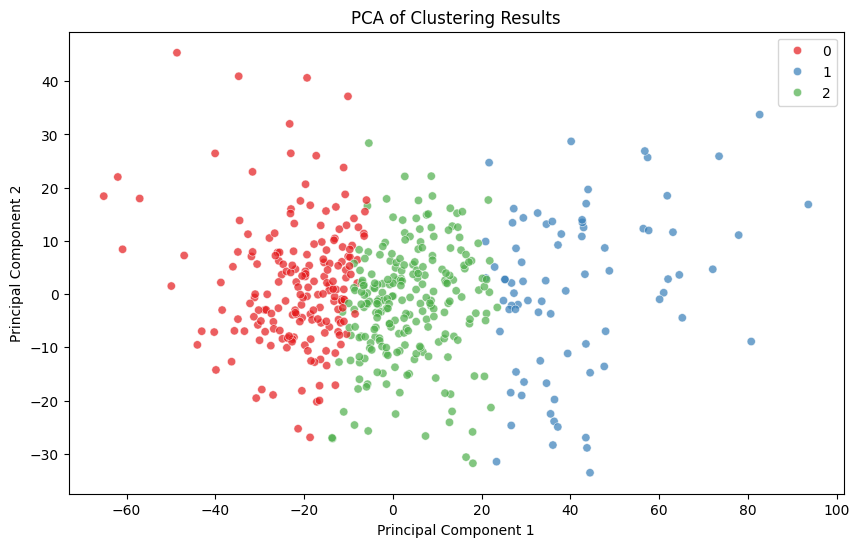

In [183]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fit PCA
pca = PCA(n_components=2)  # For 2D visualization
principal_components = pca.fit_transform(selected_df)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = kmeans.labels_

# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='Set1', alpha=0.7)
plt.title('PCA of Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# 12: Statistical Evaluation
To perform statistical evaluations on cluster characteristics, we can conduct statistical tests such as ANOVA or t-tests to compare the mean ages across different clusters.

1. Compare Mean 'Age in Years' Between Clusters
 we perform ANOVA to compare the means of age across the clusters:

In [184]:
import scipy.stats as stats
n_clusters = selected_df['Cluster'].nunique()  # or kmeans.n_clusters


# Grouping the data by cluster
grouped_data = [selected_df[selected_df['Cluster'] == i]['Age'] for i in range(n_clusters)]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f'ANOVA Test Result: F-statistic = {f_statistic}, p-value = {p_value}')


ANOVA Test Result: F-statistic = 28.521573412177787, p-value = 1.890007753146485e-12


In [185]:
# List unique clusters
clusters = selected_df['Cluster'].unique()

# Prepare groups for Age
age_groups = [selected_df[selected_df['Cluster'] == i]['Age'] for i in range(n_clusters)]


# Perform ANOVA for Age
age_anova_result = stats.f_oneway(*age_groups)
print(f"ANOVA Result for Age: F-statistic = {age_anova_result.statistic}, p-value = {age_anova_result.pvalue}")

# Prepare groups for Systolic Blood Pressure
systolic_groups = [selected_df[selected_df['Cluster'] == cluster]['systolic_pressure (mmhg)'] for cluster in clusters]

# Perform ANOVA for Systolic Blood Pressure
systolic_anova_result = stats.f_oneway(*systolic_groups)
print(f"ANOVA Result for Systolic Blood Pressure: F-statistic = {systolic_anova_result.statistic}, p-value = {systolic_anova_result.pvalue}")

# Prepare groups for Diastolic Blood Pressure
diastolic_groups = [selected_df[selected_df['Cluster'] == cluster]['diastolic_pressure (mmhg)'] for cluster in clusters]

# Perform ANOVA for Diastolic Blood Pressure
diastolic_anova_result = stats.f_oneway(*diastolic_groups)
print(f"ANOVA Result for Diastolic Blood Pressure: F-statistic = {diastolic_anova_result.statistic}, p-value = {diastolic_anova_result.pvalue}")

# Interpretation of results
if age_anova_result.pvalue < 0.05:
    print("Significant differences in Age between clusters.")
else:
    print("No significant differences in Age between clusters.")

if systolic_anova_result.pvalue < 0.05:
    print("Significant differences in Systolic Blood Pressure between clusters.")
else:
    print("No significant differences in Systolic Blood Pressure between clusters.")

if diastolic_anova_result.pvalue < 0.05:
    print("Significant differences in Diastolic Blood Pressure between clusters.")
else:
    print("No significant differences in Diastolic Blood Pressure between clusters.")


ANOVA Result for Age: F-statistic = 28.521573412177787, p-value = 1.890007753146485e-12
ANOVA Result for Systolic Blood Pressure: F-statistic = 900.4658788229389, p-value = 1.195199344611624e-165
ANOVA Result for Diastolic Blood Pressure: F-statistic = 53.10635598529715, p-value = 1.2744372358393678e-21
Significant differences in Age between clusters.
Significant differences in Systolic Blood Pressure between clusters.
Significant differences in Diastolic Blood Pressure between clusters.


In [221]:
from sklearn.cluster import KMeans
import joblib

# Assuming you have your KMeans model defined and trained as `kmeans`
joblib.dump(kmeans, 'kmeans_model.pkl')  # Save the model to a file


['kmeans_model.pkl']

# 13: Application of Clustering and Statistical Insights
1. Practical Applications of Clustering Insights

Based on the cluster centroids for systolic pressure, diastolic pressure, and age, we can derive the following practical insights for identifying high-risk patient groups and prioritizing resource allocation:

Cluster 0: High-Risk Group

Centroid Values:
Systolic Pressure: 171.95 mmHg
Diastolic Pressure: 92.85 mmHg
Age: Cluster members are generally older (positive age values).
Interpretation: This group has significantly elevated systolic and diastolic pressures, indicating uncontrolled or severe hypertension. These patients are likely to be at a higher risk for cardiovascular events such as heart attacks or strokes.

Recommendation:

Prioritize these patients for intensive treatment such as combination drug therapy or regular monitoring to prevent complications.
Allocate more healthcare resources, such as dedicated care teams, frequent follow-up visits, and close monitoring of these patients' blood pressure trends.

Cluster 1: Low-Risk Group

Centroid Values:
Systolic Pressure: 110.74 mmHg
Diastolic Pressure: 76.40 mmHg
Age: Slightly younger patients (negative age values).
Interpretation: This group has normal or mildly elevated blood pressure, indicating well-controlled hypertension or potentially no hypertension at all.

Recommendation:

These patients could be considered for regular but less intensive follow-up.
Encourage lifestyle management strategies, such as exercise and a healthy diet, to maintain their stable condition.

Cluster 2: Intermediate Risk Group

Centroid Values:
Systolic Pressure: 135.17 mmHg
Diastolic Pressure: 83.20 mmHg
Age: Slightly older (positive age values).
Interpretation: This group falls in the prehypertension or stage 1 hypertension range, where there is moderate risk but not as severe as Cluster 0.

Recommendation:

Implement preventive interventions, such as adjusting medication or promoting lifestyle changes, to prevent progression to a higher-risk category.
Regular monitoring and tailored treatment plans based on individual patient responses would be beneficial.

2. Recommendations for Personalized Treatment Strategies
Using these clusters, healthcare providers can offer personalized treatment strategies based on the risk levels and characteristics of each group:

Cluster 0 (High Risk):

Treatment Focus: Aggressive antihypertensive medication, frequent check-ups, and lifestyle modification.
Other Interventions: Possibly recommend further diagnostic tests to check for target organ damage (heart, kidneys, brain).

Cluster 1 (Low Risk):

Treatment Focus: Maintain current treatments if applicable; focus on preventive care through lifestyle counseling.
Other Interventions: Monitor periodically, and possibly lower the intensity of drug therapy for long-term stability.

Cluster 2 (Intermediate Risk):

Treatment Focus: Adjust or initiate medication to ensure blood pressure doesn't increase further; recommend dietary and exercise interventions.
Other Interventions: Establish closer follow-ups to monitor progression and adapt treatment as needed.

# 14: Statistical Reporting
1. Significant Statistical Findings/ Evidence-Based Insights

Significant Age Differences Across Clusters:
The ANOVA test confirmed significant age differences between the clusters, with older patients more likely to be in the higher-risk group (Cluster 0). Age is an important factor in managing blood pressure and allocating resources, as older patients are more prone to hypertension-related complications.

Clinical Insight: Elderly patients should receive tailored interventions such as medication review, cognitive health assessments, and comprehensive cardiovascular evaluations.
Systolic Pressure Differences Based on Chronic Illness:
The t-test for systolic pressure by chronic illness was highly significant, with a p-value of 2.27×10−6. This finding shows that patients with chronic illnesses, such as hypertension or diabetes, tend to have elevated systolic pressures.

Clinical Insight: Chronic illness management needs to be a key focus in high-risk patients (Cluster 0), as controlling underlying conditions can prevent further blood pressure escalation.

Gender Differences in Systolic Pressure:

The t-test for systolic pressure by gender was also significant, with a p-value of 0.0101, suggesting that male and female patients may require different blood pressure management strategies.

Clinical Insight: Gender-based approaches to hypertension management may be beneficial, such as recognizing that certain medications work better in women than men due to hormonal differences or body composition.

2. Connecting Statistical Findings with Clustering Results/Relating Statistical Findings to Clustering Results

The statistical analyses reinforce the clustering results by highlighting the distinct characteristics of each group:

Older patients are more likely to belong to the high-risk cluster (Cluster 0), as shown by the significant age differences. This aligns with the need for increased healthcare resources for this group, as older patients tend to have more comorbid conditions and are more susceptible to adverse outcomes.

Patients with chronic illnesses often have higher systolic blood pressure, making them prime candidates for inclusion in the high-risk cluster (Cluster 0). Managing chronic conditions effectively is crucial for improving their overall health outcomes.

Gender differences in systolic pressure suggest that men and women may benefit from different treatment approaches, adding a layer of personalization to the management plans for each cluster.

By leveraging clustering insights, we can implement targeted healthcare interventions for specific patient groups based on their risk levels. The statistical analysis validates the clusters and provides evidence-based insights into how we can prioritize resources and offer personalized treatment strategies. This approach will enhance patient outcomes, optimize resource allocation, and ensure that high-risk groups receive the care they need while maintaining preventive measures for low-risk groups.







 # 15: Model Deployment
1. Steps for Deploying the Clustering Model and Statistical Insights

A. Deployment Framework

a) Select the Deployment Environment:

Choose a cloud service (such as AWS, GCP, or Azure) or an on-premise solution for model hosting and data management.

Use a web-based application with an intuitive user interface to allow healthcare providers to interact with the model and view patient clustering results.

b) Model Containerization:
Containerize the model using technologies like Docker.
This ensures the model can run consistently across different environments.

The Docker container will include the clustering model (such as KMeans or an improved version) and any dependencies (e.g., Python libraries like scikit-learn, pandas, numpy).

c) API Development:

Develop an API (Application Programming Interface) using frameworks like Flask or FastAPI to expose the clustering model as a service. This allows healthcare applications to send patient data and retrieve clustering results.

Example API endpoints:

POST /predict_cluster: Accepts patient data (age, systolic/diastolic pressure, etc.) and returns the cluster assignment.

GET /cluster_summary: Provides details on the characteristics of each cluster, based on updated data.

# B. Model Update and Maintenance

a) Continuous Learning:

The model must be regularly updated as new patient data becomes available. Implement scheduled retraining to incorporate fresh data, ensuring that the model evolves with the patient population.
Use a version control system (e.g., Git) for the model and codebase to track changes, allowing for rollback in case of issues.

b) Data Pipeline for Updates:

Set up an ETL pipeline (Extract, Transform, Load) to collect new patient data, clean it, and integrate it into the existing dataset.
Automate data pre-processing (e.g., scaling, encoding) for new patient data before model prediction.

c) Performance Monitoring:

Implement real-time monitoring of the clustering model’s performance, including metrics like Silhouette Score or cluster stability over time.

Use dashboards (e.g., Grafana or Kibana) to visualize the distribution of new patients across clusters and track changes in patient characteristics over time.

2. Using the Clustering Model for New Patient Data

Once deployed, the clustering model will be used to classify new patient data into the existing clusters. The following process outlines how unseen patient data can be managed:

A. Assigning New Patients to Clusters
Data Input:
New patient data, including features like Age, systolic_pressure (mmhg), and diastolic_pressure (mmhg), is passed to the clustering model.

Preprocessing:

The same pre-processing steps used during training (such as scaling age or imputing missing values) must be applied to the new data.
Cluster Assignment:

The preprocessed data is fed into the trained clustering model (e.g., KMeans), which will assign the patient to one of the existing clusters (Cluster 0, Cluster 1, or Cluster 2).
The API endpoint /predict_cluster can be used for assigning new patients to their respective clusters.
Example Process:
Input: A new patient has the following data:
Age: 58
Systolic pressure: 145 mmHg
Diastolic pressure: 88 mmHg

Prediction: After scaling the age and applying the KMeans model, the patient might be assigned to Cluster 2.

Output: The healthcare provider receives the cluster information and corresponding recommendations (e.g., this patient is in the intermediate-risk group, and moderate intervention is required).

B.Real-Time Application of Statistical Findings
Once a patient is assigned to a cluster, the statistical insights can guide personalized treatment recommendations:

Risk Identification:

Based on the cluster assignment, healthcare providers can immediately identify whether the patient belongs to a high-, medium-, or low-risk group.
Tailored Recommendations:
Cluster 0 (High-Risk Group): Aggressive interventions, such as adjusting medications or scheduling more frequent monitoring.
Cluster 1 (Low-Risk Group): Continued maintenance of current therapies with a focus on lifestyle improvement.
Cluster 2 (Intermediate-Risk Group): Moderate treatment 
adjustments, combined with regular follow-ups.

 # C.Model Retraining Workflow

When new patient data arrives over time, the clustering model can be updated periodically to reflect changes in the population.Followingn steps are done:

Data Collection:
New patient data is collected, preprocessed, and added to the existing dataset.

Retraining:
The model is retrained with both the old and new data to refine the clusters. Retraining can occur quarterly or as per data availability.

Deploy Updated Model:
After testing the updated model, the newer version is deployed, replacing the old one.

3. Healthcare Decision Support
In a healthcare environment, deploying this clustering model will help in:

Early Identification of High-Risk Patients:
By analyzing patient characteristics like blood pressure and age, the model can quickly flag those in Cluster 0 (high risk) for urgent care, preventing the occurrence of adverse outcomes such as heart attacks or strokes.

Personalized Treatment Plans:
Patients in each cluster can receive tailored treatment based on their risk profile, ensuring that high-risk individuals receive aggressive interventions while low-risk patients maintain preventive care.

Efficient Resource Allocation:
Hospitals or clinics can allocate resources more efficiently by focusing on high-risk groups that require immediate attention and by providing preventive services to low-risk groups.




1. Preprocessing for New Data

Before deploying the model, ensure that new data goes through the same preprocessing steps used in the original model.


In [218]:
# Example of fitting scaler with original data (excluding Cluster column)
features = ['Age', 'systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df[features])


# New patient data (ensure the same features are present)
new_data = pd.DataFrame({
    'Age': [58],
    'systolic_pressure (mmhg)': [100],
    'diastolic_pressure (mmhg)': [70]
})

# Transform the new patient data
new_data_scaled = scaler.transform(new_data[features])

print(new_data_scaled)


[[ 0.1621559  -1.34619655 -0.93979989]]


2. Assigning New Data to Existing Clusters and predict the cluster for new data

Now, after preprocessing, we can assign the new patient to an existing cluster using the trained KMeans model.

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Fit the KMeans model on the scaled original data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)


# Scale the new patient data
new_data_scaled = scaler.transform(new_data[features])

# Predict the cluster for the new data using the pre-trained KMeans model
new_patient_cluster = kmeans.predict(new_data_scaled)

print(f'The new patient belongs to cluster: {new_patient_cluster[0]}')



The new patient belongs to cluster: 1


3. API Development for Model Prediction

To deploy the model in a real-world setting, we can expose it through an API. Below is an example using Flask for deploying the clustering model

#check app.py

4. Updating the Model with New Data

As more patient data becomes available, you may want to periodically update the model to reflect current trends in the patient population. Here’s how to retrain the model with new data:

5. Monitoring Model Performance

You can monitor the performance of your clustering model over time to ensure that the clusters remain distinct and meaningful:

6. Using Clustering Insights for Healthcare Decisions

Based on the clusters, healthcare providers can take actions such as prioritizing treatment for high-risk patients (those in Cluster 0):

In [220]:
# Define personalized recommendations based on the assigned cluster
def personalized_treatment(cluster):
    if cluster == 0:
        return "High risk: Immediate medical intervention required."
    elif cluster == 1:
        return "Low risk: Continue current treatment and monitor regularly."
    elif cluster == 2:
        return "Moderate risk: Moderate adjustments to treatment, regular follow-up."
    else:
        return "No risk group identified."

# Get treatment recommendation for new patient
recommendation = personalized_treatment(new_patient_cluster)
print(recommendation)


Low risk: Continue current treatment and monitor regularly.


steps

Preprocessing: All new patient data should be preprocessed using the same method (scaling, encoding) that was applied during training.

Clustering: Once preprocessed, the new data is passed to the clustering model to determine the cluster assignment, which is then used for personalized treatment recommendations.

API Deployment: The clustering model can be deployed via a Flask API, allowing real-time predictions for new patient data.

Model Updates: Retraining the model with new patient data ensures that the model evolves with time, staying accurate and relevant.

Healthcare Insights: Based on the cluster assignment, healthcare providers can receive tailored treatment strategies and resource allocation plans for each patient group